### Описание проекта
По доступным из открытых источников историческим данным о продажах игр, оценкам пользователей и экспертов, жанрам и платформам (например, Xbox или PlayStation) нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.info()
games_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Выводы
В данных почти нет пропусков, кроме столбцов с рейтингом, оценками критиков и пользователей. На первый взгляд эти пропуски чаще присутствуют в данных для старых игр. Возможно, что система рейтингов и оценок появилась в каком-то определенном году и для игр старше этого года их просто еще не было.
Оценки пользователей имеют значения от 0 до 10, критиков - от 0 до 100. Думаю, что следует привести их к общей шкале, так мы сможем оценивать средний рейтинг для игр.
Так же режет глаз формат записи года выпска, его надо будет привести к типу datetime.
Не очень понятно какому возрасту соответствуют значения в столбце рейтинга.

### Предподготовка
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Приведем названия столбцов к нижнему регистру

In [4]:
games_data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [5]:
games_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1678,Pikmin 2,GC,2004.0,Strategy,0.48,0.13,0.56,0.03,90.0,9.1,E
14919,Last Escort 2: Shinya no Amai Toge,PS2,2008.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
2275,Xenoblade Chronicles,Wii,2010.0,Role-Playing,0.43,0.25,0.16,0.07,92.0,8.9,T
6446,Tales of Eternia,PSP,2005.0,Role-Playing,0.00,0.01,0.25,0.00,NaN,NaN,NaN
4298,NCAA Gamebreaker 99,PS,1998.0,Sports,0.25,0.17,0.00,0.03,NaN,NaN,NaN
5658,Live A Live,SNES,1994.0,Role-Playing,0.00,0.00,0.32,0.00,NaN,NaN,NaN
2847,Borderlands: The Pre-Sequel,X360,2014.0,Shooter,0.46,0.19,0.01,0.07,74.0,6.4,M
5767,J-League Winning Eleven 2007: Club Championship,PS2,2007.0,Sports,0.00,0.00,0.31,0.00,NaN,NaN,NaN
11356,Smart Bomb,PSP,2005.0,Puzzle,0.07,0.00,0.00,0.01,45.0,5.4,E10+
3220,XCOM: Enemy Unknown,X360,2012.0,Strategy,0.36,0.21,0.00,0.05,90.0,8.3,M


In [6]:
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Поскольку нам нужно в дальнейшем брать данные за актуальный период, то игры, год выпуска которых неизвестен, можно удалить из датафрейма. Тем более их всего чуть больше 1,5%. После этого приведем столбец к int.
Удалим также и 2 строки, где неизвестны имя и жанр игры, толку в них немного.

In [7]:
games_data.dropna(subset=['year_of_release'], inplace=True)
games_data['year_of_release'] = games_data['year_of_release'].astype('int')

games_data.dropna(subset=['name'], inplace=True)


В столце оценок пользователей попадается значение tbd (to be determined), то есть еще не определен, например, из-за недостаточного количества оценок. 
Переведем оценки пользователей в числовой формат, tbd при этом заментся на NaN, в нашем случае это значения не имеет, важно только то, что у игры нет оценки.
Заодно приведем оценки пользователей к общей шкале с оценками критиков.

In [8]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce') * 10

In [9]:
games_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12252,"Flower, Sun, and Rain",DS,2008,Adventure,0.06,0.00,0.00,0.00,54.0,71.0,T
5504,Disgaea: Hour of Darkness,PS2,2003,Role-Playing,0.16,0.13,0.00,0.04,84.0,89.0,T
7078,Tales of Berseria,PS4,2016,Role-Playing,0.00,0.00,0.23,0.00,NaN,NaN,T
13390,Full Spectrum Warrior: Ten Hammers,XB,2006,Strategy,0.03,0.01,0.00,0.00,69.0,NaN,M
4194,Inazuma Eleven Go 2: Chrono Stone,3DS,2012,Role-Playing,0.00,0.01,0.46,0.00,NaN,NaN,NaN
12589,Worldwide Soccer,SAT,1994,Sports,0.00,0.00,0.06,0.00,NaN,NaN,NaN
9325,Suzumiya Haruhi no Tomadoi,PS2,2008,Adventure,0.00,0.00,0.13,0.00,NaN,NaN,NaN
13944,Ide Yosuke no Mahjong Kazoku,PS,1995,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
11561,Crush,PSP,2007,Puzzle,0.07,0.00,0.00,0.01,83.0,90.0,E10+
4761,Mouse Trap,2600,1981,Action,0.38,0.02,0.00,0.00,NaN,NaN,NaN


In [10]:
#Приглядимся к столбцу Рейтинг
games_data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

###### Рейтинг ESRB
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Видим какой-то K-A, такого рейтинга не существует, удалим эти 3 игры.

In [11]:
games_data = games_data.query("rating != 'K-A'")
games_data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Добавим столбец с суммарными продажами по всем регионам.

In [12]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

In [13]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод
Названия столбцов приведены к нижнему регистру. Изменен тип столбца year_of_release на int, значения NaN удалены. В столбце user_score значения "tbd" заменены на NaN, типу столбца изменен на float, значения приведены к общей шкале с critic_score.
Удалены данные с рейтингом, не входящим в шкалу ESRB.
В общую таблицу добавлен столбец, где для каждого игры подсчитаны продажи по всем регионам.

Данные подготовлены к дальнейшему анализу.

### Исследовательский анализ данных
- Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
- Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

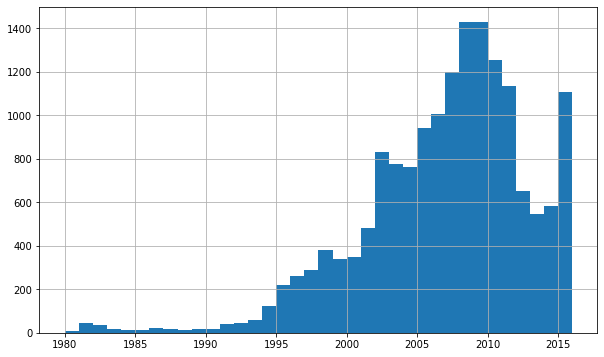

In [14]:
games_data['year_of_release'].hist(bins=36, figsize=(10,6));

Все данные учитывать, конечно, не обязательно. Хвост до 2000го года можно откинуть не задумываясь. Есть несколько заметных скачков в количестве выпускаемых игр - от 300 до 500 игр в год (2002) и с 500 до 800 (2003). Но это довольно давно с точки зрения индустрии. Более свежие скачки - на 200 игр в год случились в 2006м, 2008м и 2009м.

###### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [15]:
games_data['platform'].value_counts().head(10)

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1189
PC       955
GBA      811
XB       803
Name: platform, dtype: int64

In [16]:
sales_per_platform = games_data.pivot_table(index=('platform'), values='total_sales', aggfunc='sum')
sales_per_platform.sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,725.67
PS4,314.14
GBA,312.88
PSP,289.53


С большим отрывом выделяются по продажам 6 платформ - PS2, X360, PS3, Wii, DS, PS. Как пользователю PC сейчас было обидно.

Построим для них распределение по годам.

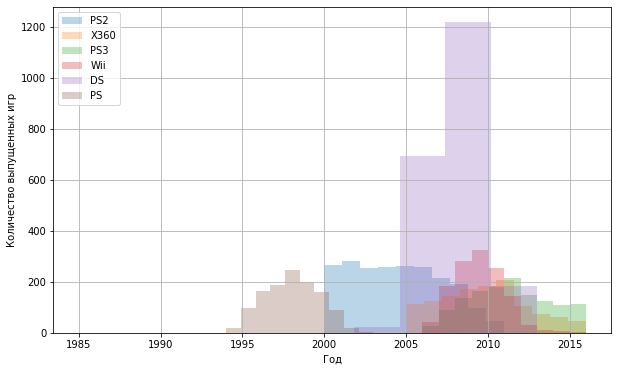

In [18]:
games_data.loc[games_data['platform']=='PS2']['year_of_release'].hist(bins=10, alpha = 0.3, figsize=(10,6))
games_data.loc[games_data['platform']=='X360']['year_of_release'].hist(alpha = 0.3)
games_data.loc[games_data['platform']=='PS3']['year_of_release'].hist(alpha = 0.3)
games_data.loc[games_data['platform']=='Wii']['year_of_release'].hist(alpha = 0.3)
games_data.loc[games_data['platform']=='DS']['year_of_release'].hist(alpha = 0.3)
games_data.loc[games_data['platform']=='PS']['year_of_release'].hist(alpha = 0.3);
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], loc='upper left')
plt.show()

In [19]:
print('Подолжительность жизни платформ:')
for argument in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    print(argument, games_data.loc[games_data['platform']==argument]['year_of_release'].max() -  
          games_data.loc[games_data['platform']==argument]['year_of_release'].min())

Подолжительность жизни платформ:
PS2 11
X360 11
PS3 10
Wii 10
DS 28
PS 9


Первая из 6ти самых коммерчески успешных платформ (PS) появилась в 1994м, следующая - через 6 лет, в 2000м, через 4года после этого появляется самая успешная PS2, а еще через 2, в 2006м - сразу 3! Это  X360, PS3, Wii.
Среднее время жизни для всех платформ - около 10 лет. Видимо, это срок, за который устаревает "железо".

###### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

На мой взгляд - имеет смысл строить прогноз на основе данных по платформам которые выпускают игры до сих пор (мы в 2016м). Это те самые три платформы, которые появились в 2006м году - X360, PS3, Wii. В этом же году произошел один из заметных скачков в динамике выпускаемых игр. 
Значит решено - берем период с 2006го по 2016 года.

##### Не учитывайте в работе данные за предыдущие годы
сделаем срез данных, начиная с 2006го года.

In [20]:
games_actual_data = games_data.query('year_of_release>2005')
#games_actual_data.head(10)

##### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [39]:
sales_per_platform_act = games_actual_data.pivot_table(index=('platform', 'year_of_release'), values='total_sales', aggfunc='sum')
#sales_per_platform.sort_values(by='total_sales', ascending=False)
sales_per_platform_act = sales_per_platform_act.reset_index()
sales_per_platform_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
platform           95 non-null object
year_of_release    95 non-null int64
total_sales        95 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


3DS 257.81000000000006


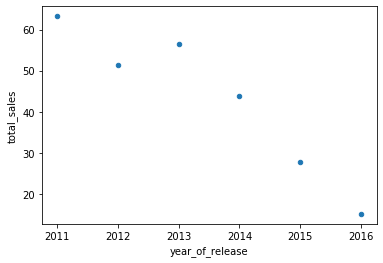

DC 0.06


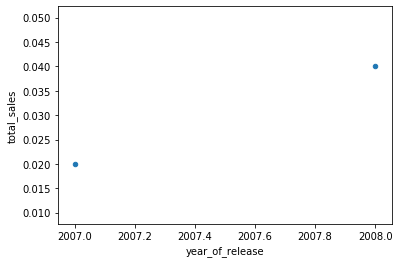

DS 655.350000000001


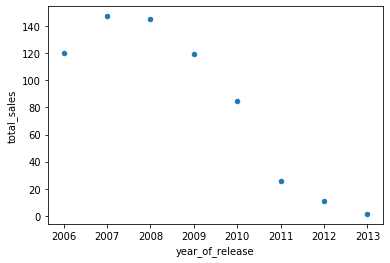

GBA 8.68


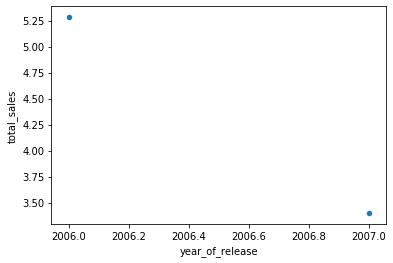

GC 11.53


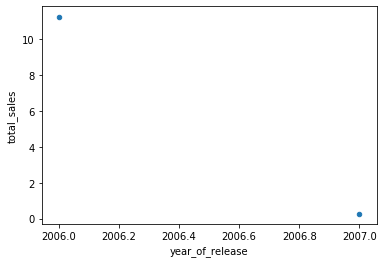

PC 163.42


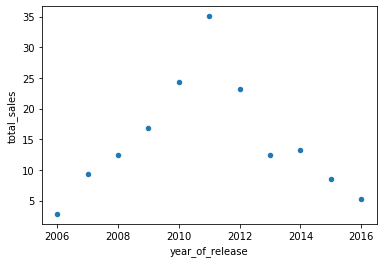

PS2 265.7999999999999


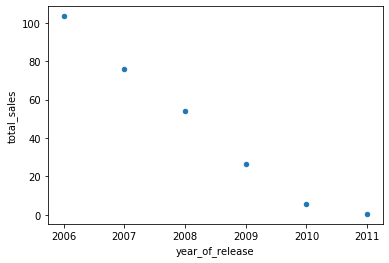

PS3 931.3400000000004


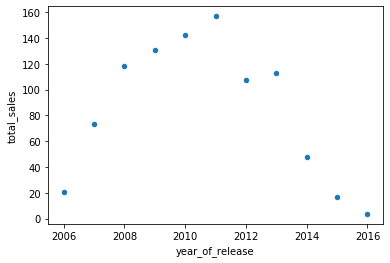

PS4 314.14000000000004


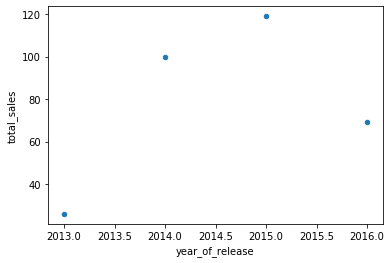

PSP 238.63000000000022


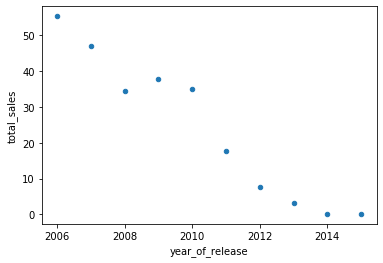

PSV 53.80999999999997


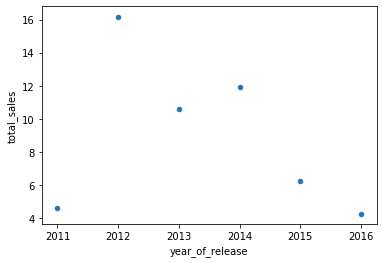

Wii 891.1800000000001


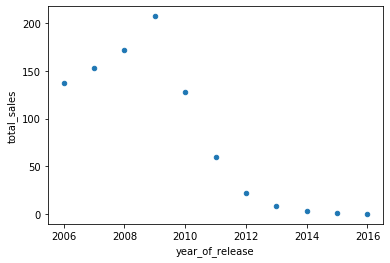

WiiU 82.19


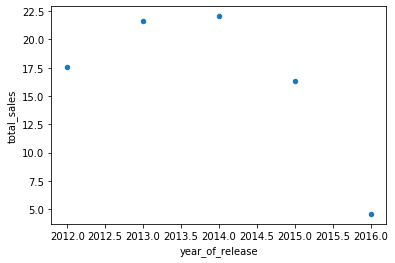

X360 952.9900000000005


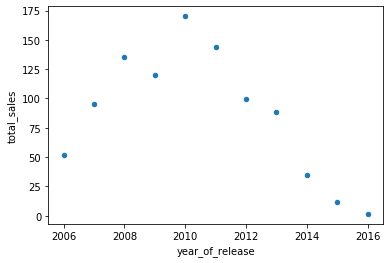

XB 10.76999999999999


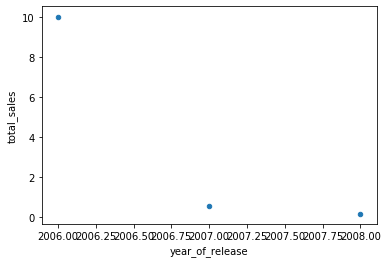

XOne 159.32000000000005


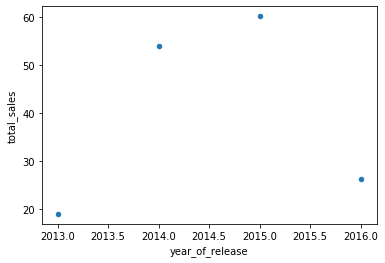

In [22]:
for argument in sales_per_platform_act['platform'].unique():
    print(argument, sales_per_platform_act.loc[sales_per_platform_act['platform']==argument]['total_sales'].sum())
    sales_per_platform_act.loc[sales_per_platform_act['platform']==argument].plot(x='year_of_release', y='total_sales', kind='scatter')
    plt.show()

In [23]:
sales_per_platform_act.loc[sales_per_platform_act['year_of_release']>2014]

,platform,year_of_release,total_sales
4,3DS,2015,27.78
5,3DS,2016,15.14
29,PC,2015,8.52
30,PC,2016,5.25
46,PS3,2015,16.82
47,PS3,2016,3.60
50,PS4,2015,118.90
51,PS4,2016,69.25
61,PSP,2015,0.12
66,PSV,2015,6.25


По продажам с большим отрывом лидирует PS4, за ним следует XOne, затем 3DS и снова с большим отрывом идут PSV, PC и WiiU.

Практически по всем платформам наблюдается падение в 20016м относительно 2015. Но поскольку данные за 2016 неполные, то теоретически PC и PS4 могут еще показать рост.

Потенциально прибыльна PS4 - как по общим продажам(тут она лучшая), так и по неплохой динамике.
По продажам на втором месте идет XOne и хотя пока она показывает значительное падение относительно предыдущего года, по продажам она все равно сильно опережает 3е место. 
Еще я бы выбрал PC и PSV. Несмотря на относительно невысокий уровень продаж этих платформ, динамика у них стабильна и есть надежда на рост по итогам года.
##### Итого: выбираем PS4, XOne, PC и PSV.

#### Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

count    10333.000000
mean         0.483598
std          1.552724
min          0.000000
25%          0.050000
50%          0.140000
75%          0.410000
max         82.540000
Name: total_sales, dtype: float64

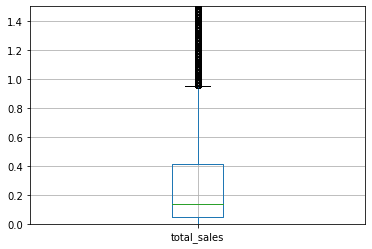

In [24]:
plt.ylim(0, 1.5)
games_actual_data.boxplot(column='total_sales')
games_actual_data['total_sales'].describe()

Q1-3 * IQR, Q3 + 3 * IQR

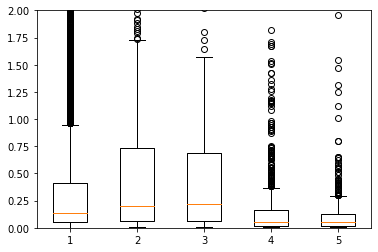

In [25]:
for argument in games_actual_data['platform'].unique():
    Q1 = np.percentile(games_actual_data.loc[games_actual_data['platform']==argument]['total_sales'], 25)
    Q3 = np.percentile(games_actual_data.loc[games_actual_data['platform']==argument]['total_sales'], 75)
    IQR = Q3 - Q1
#    print(argument)
#    plt.ylim(0, Q3 + 3 * IQR)
#    plt.xlim(0, 5)
#    games_actual_data_
#    games_actual_data.loc[games_actual_data['platform']==argument].boxplot(column='total_sales')
#    print(games_actual_data.loc[games_actual_data['platform']==argument]['total_sales'].describe())

plt.boxplot([games_actual_data['total_sales'],
            games_actual_data.loc[games_actual_data['platform']=='PS4']['total_sales'],
            games_actual_data.loc[games_actual_data['platform']=='XOne']['total_sales'],
            games_actual_data.loc[games_actual_data['platform']=='PC']['total_sales'],
            games_actual_data.loc[games_actual_data['platform']=='PSV']['total_sales']])
plt.ylim(0,2)
plt.show()

Среднее по всем играм - 0,48, медиана - 0,14. 
Среднее тут действительно среднее. 2 платформы из выборки больше ее в 1,5 (XOne) и 2 раза(PS4), а 2  - меньше (PC и PSV).
Что же касается сравнения между собой, то разброс между самой успешной платформой PS4 и отстающими - в 4 раза. С ближайшим конкурентом XOne разница не так велика - около 20%.

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [26]:
# Возьмем самую популярную платформу - PS4
#PS4_data = games_actual_data.loc[games_actual_data.loc[:,'platform']=='PS4']
PS4_data = games_actual_data[games_actual_data['platform']=='PS4']
#PS4_data = games_actual_data.query('platform=="PS4"')

#PS4_data['mean_score'] = (PS4_data['user_score'] + PS4_data['critic_score'])/2

* Оценки пользователей

In [27]:
PS4_data_user = PS4_data.copy()
PS4_data_critic = PS4_data.copy()

PS4_data_user.dropna(subset=['user_score'], inplace=True)
PS4_data_critic.dropna(subset=['critic_score'], inplace=True)

PS4_data_user.reset_index()
PS4_data_critic.reset_index()
print(len(PS4_data_user))
print(len(PS4_data_critic))


257
252


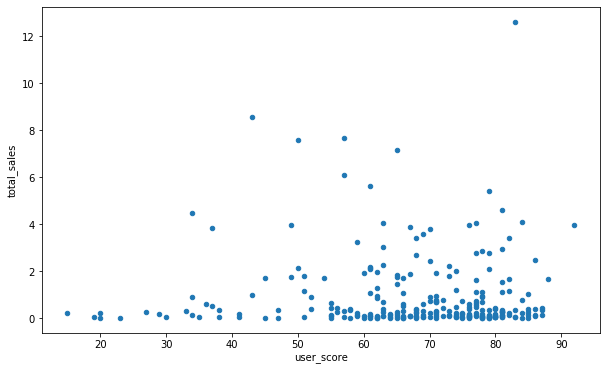

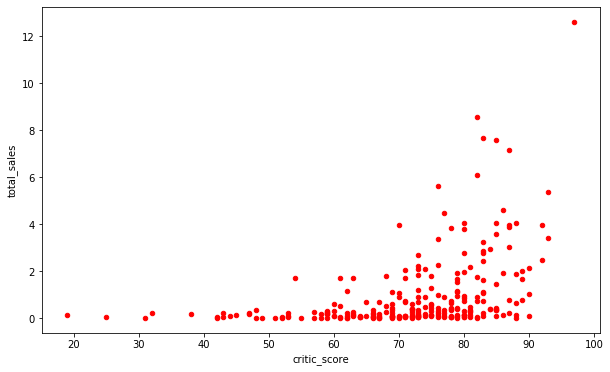

In [28]:
PS4_data_user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 6))
PS4_data_critic.plot(x='critic_score', y='total_sales', kind='scatter', color='red', figsize=(10, 6))
plt.show()

In [29]:
print('Корреляция продаж и оценок пользователей', PS4_data_user['user_score'].corr(PS4_data_user['total_sales']))
print('Корреляция продаж и оценок критиков', PS4_data_critic['critic_score'].corr(PS4_data_critic['total_sales']))

Корреляция продаж и оценок пользователей -0.031957110204556445
Корреляция продаж и оценок критиков 0.40656790206178095


In [30]:
PS4_data.loc[PS4_data['total_sales']==PS4_data['total_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63


И график, и коэффициент Пирсона показывают, что связь между отзывами пользователей и сборами довольно опосредованная - подавляющая масса колеблется чуть выше нуля, невзирая на рейтинг. Но есть и хиты, собравшие 4-6-8 миллионов, но имеющие у пользователей довольно низкий рейтинг (35-40-60 из 100). 
    
  А вот оценки критиков коррелируют с продажами гораздо более явно. Это видно и по графику, и по коэффициенту. Изредка игры с низкими оценками набирают по 2 миллиона, но это смотрится как исключения. А игры с действительно хорошами сборами имеют рейтинг от 70.
    Но это может быть вызвано как тем, что критики гораздо лучше разбираются в играх, чем пользователи, так и тем, что они выставляют свои оценки уже зная, как продается та или иная игра.
   
   И только GTA5 улетела в стратосферу с 12 миллионами сборов, но даже она получила у критиков почти максимально возможную оценку 97, а у пользователей - лишь скромные 83 из 100.  

##### Соотнесите выводы с продажами игр на других платформах

XOne Корреляция продаж и оценок пользователей -0.06892505328279411
XOne Корреляция продаж и оценок критиков 0.4169983280084017


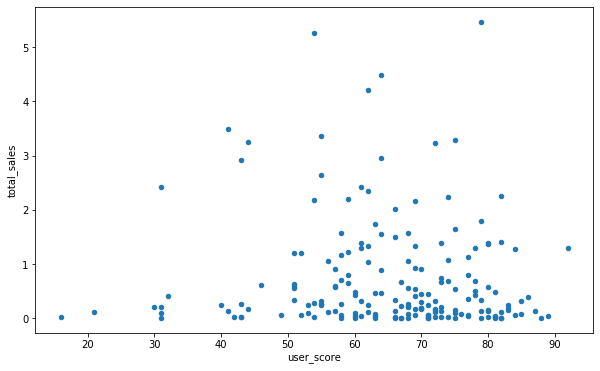

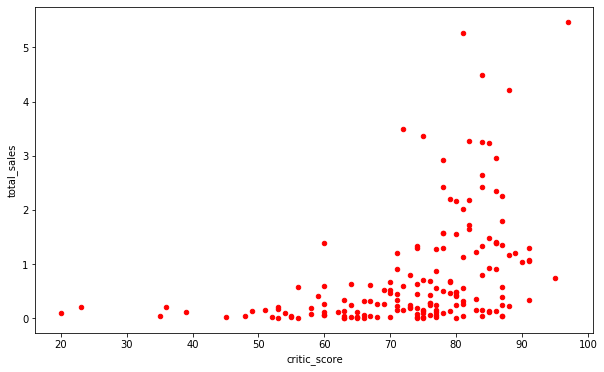

PC Корреляция продаж и оценок пользователей -0.020555707172675495
PC Корреляция продаж и оценок критиков 0.2869193299236143


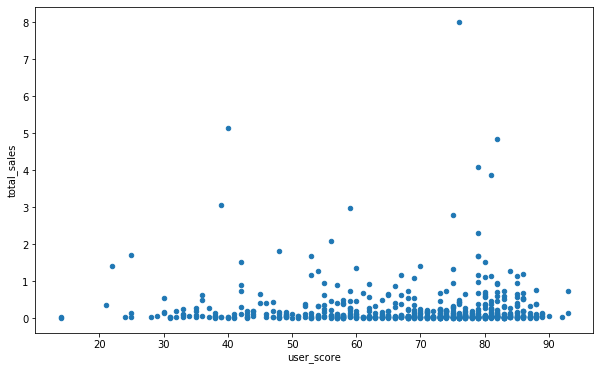

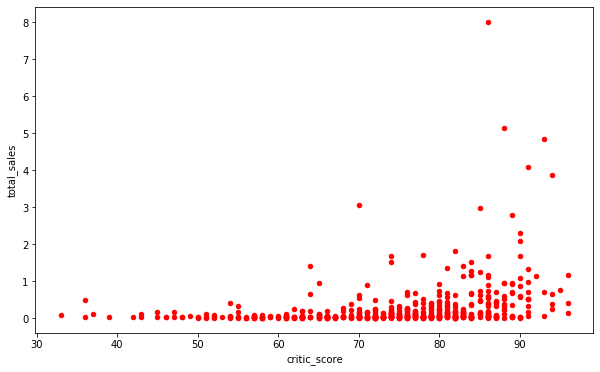

PSV Корреляция продаж и оценок пользователей 0.013488756835886512
PSV Корреляция продаж и оценок критиков 0.13176292727608935


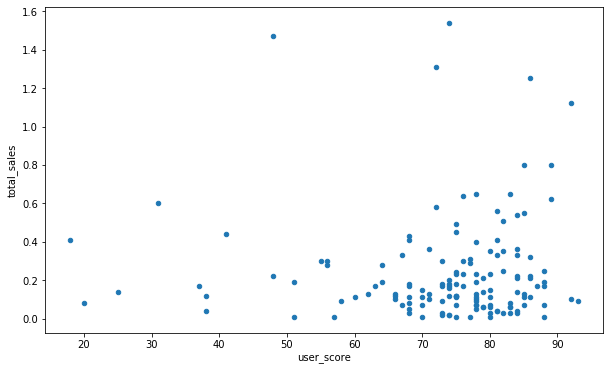

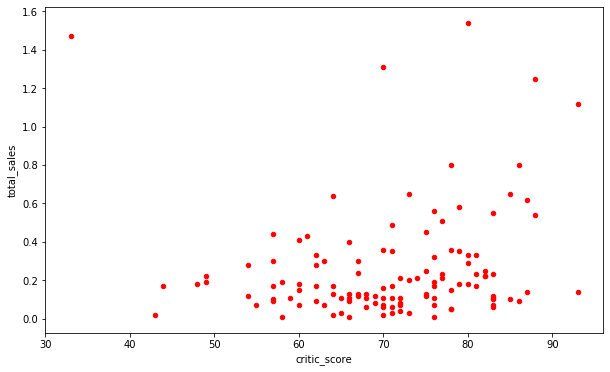

In [31]:
for argument in ['XOne', 'PC', 'PSV']:
    platform_data = games_actual_data.loc[games_actual_data.loc[:,'platform']==argument]
    print(argument, 'Корреляция продаж и оценок пользователей', platform_data['user_score'].corr(platform_data['total_sales']))    
    platform_data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 6))
    print(argument, 'Корреляция продаж и оценок критиков', platform_data['critic_score'].corr(platform_data['total_sales']))    
    platform_data.plot(x='critic_score', y='total_sales', kind='scatter', color='red', figsize=(10, 6))
    plt.show()


На других платформах так же видим, что оценки критиков коррелируют с продажами игр. Для Xbox One эта корреляция даже еще более явная, чем для PS4. Для PC похуже. Для PSV совсем плохо. Скорее всего, это связано с тем, что более богатый рынок игр для PS4 и Xbox One может привлекать более качественных критиков, чем "бедные" рынки PC и PSV.
    Но общим для всех платформ остается одно - пользователи неизменно попадают пальцем в небо.

##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Sports 793.85


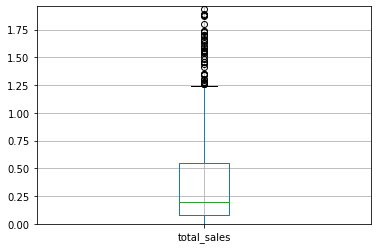

Racing 299.0


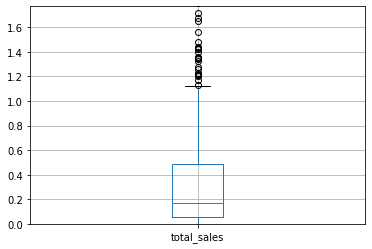

Platform 279.74


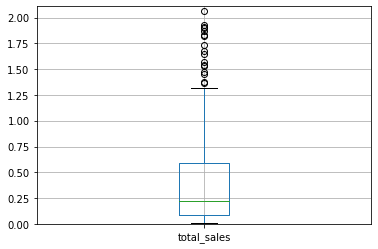

Misc 554.86


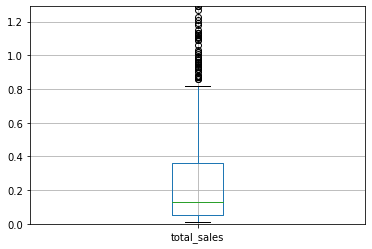

Action 1116.6499999999999


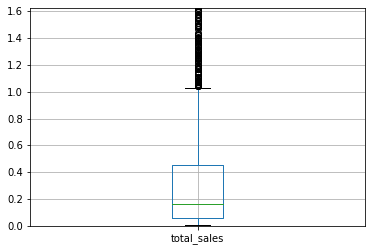

Role-Playing 522.4


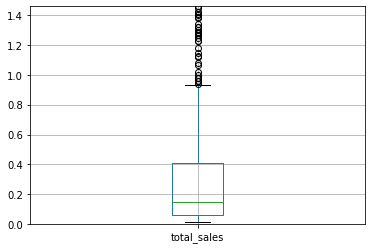

Shooter 717.04


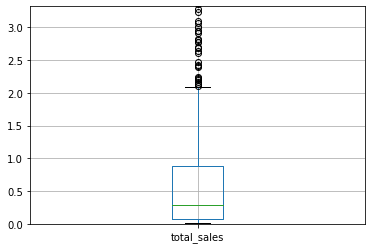

Fighting 188.42000000000002


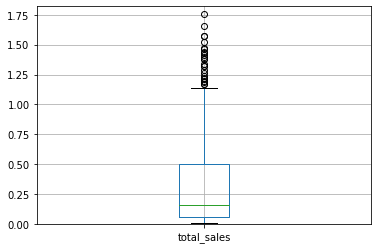

Simulation 220.65


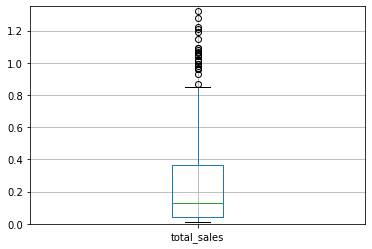

Adventure 141.35000000000002


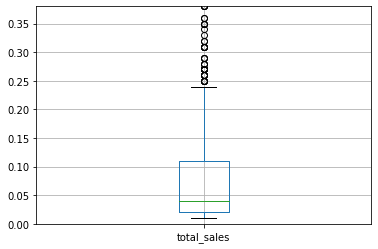

Puzzle 89.92


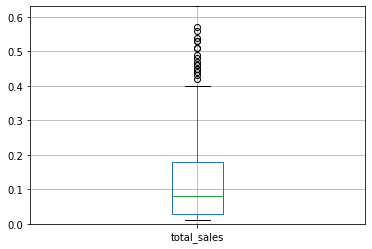

Strategy 73.14000000000001


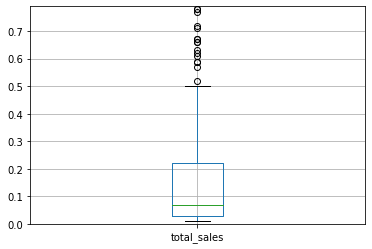

In [32]:
for argument in games_actual_data['genre'].unique():
    Q1 = np.percentile(games_actual_data.loc[games_actual_data['genre']==argument]['total_sales'], 25)
    Q3 = np.percentile(games_actual_data.loc[games_actual_data['genre']==argument]['total_sales'], 75)
    IQR = Q3 - Q1
    plt.ylim(0, Q3 + 3 * IQR)
    games_actual_data.loc[games_actual_data['genre']==argument].boxplot(column='total_sales')

    print(argument, games_actual_data.loc[games_actual_data['genre']==argument]['total_sales'].sum())
    plt.show()

Sports, Platform и Shooter более прибыльны, чем Racing, Action, Fighting  и RPG и гораздо прибыльней Strategy, Puzzle, Adventure и Simulation. Это видят и производители - общие сборы в хорошо продающихся жанрах намного выше, чем в менее популярных.

### Портрет пользователя для каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

platform


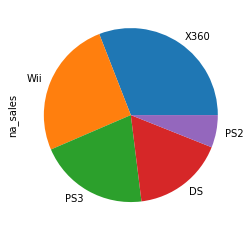

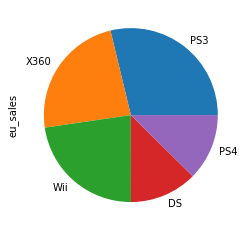

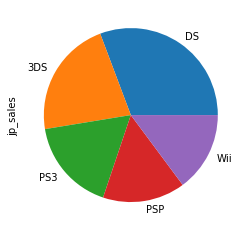

genre


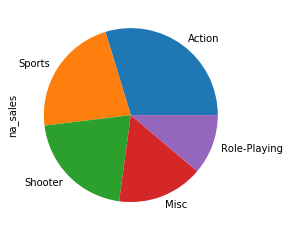

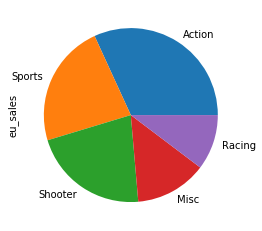

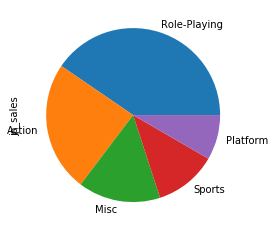

rating


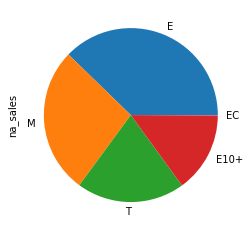

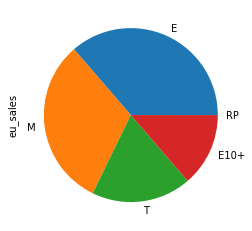

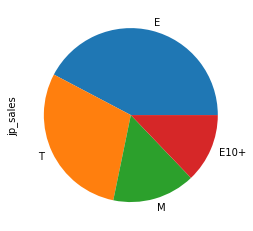

In [33]:
for argument in ['platform', 'genre', 'rating']:
    print(argument)
    for country in ['na_sales', 'eu_sales', 'jp_sales']:
        sales_per_genre_region = games_actual_data.pivot_table(index=argument, values=country, aggfunc='sum')
        sales_per_genre_region = sales_per_genre_region.reset_index()
        top_region_genres = sales_per_genre_region.sort_values(by=country, ascending=False).reset_index()
        top_region_genres = top_region_genres.loc[0:4]
        labels = top_region_genres[argument]
        top_region_genres.plot(kind='pie', labels=labels, y=country, legend=False)
        plt.show()

Очень любопытные получились диаграммы. Оказывается, в разных регионах предпочитают играть на разных платформах. В Америке первая тройка X360 - Wii - PS3, в Европе она та же, но места распределились иначе - PS3 - X360 - Wii. Япония, как всегда, отдельная планета, болье всего играют там на DS, 3Ds и только на 3м месте PS3.

А вот по жанрам Америка и Европа оказались очень близки. Первые 4 позиции совпадают, причем с похожими долями: Action, Sports, Shooter и Misc. В Японии же треть рынка занимают ролевые игры, четверть забрала Action и остатки делят между собой Misc, Sports и Platform.

Рейтинг ESRB на продажи почти не влияет. Везде треть рынка занимают игры с рейтингом Е-для всех. Дальше практически с одинаковыми долями игры для взрослых (М), подростков(Т) и для детей старше 10 (Е10+). Единственное отличие Японии - это то что там доли игр для взрослых и подростков поменялись местами.

### Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Проверяем гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
Возьмем за нулевую гипотезу равенство пользовательских рейтингов платформ Xbox One и PC, альтернативная - рейтинги отличаются.

Так как у нас две выборки, представляющие две генеральные совокупности, то имеем дело с гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Так как параметры совокупностей схожи, оставим параметр equal_var в значении по умолчанию (True).

In [34]:
from scipy import stats as st

In [35]:
games_actual_data.dropna(subset=['user_score'], inplace=True)

rating_XOne = games_actual_data.loc[games_actual_data['platform']=='XOne']['user_score']
rating_PC   = games_actual_data.loc[games_actual_data['platform']=='PC']['user_score']

alpha_ratings = 0.05 #критический уровень статистической значимости

results_ratings = st.ttest_ind(rating_XOne, rating_PC)
print('p-значение: ', results_ratings.pvalue)

if (results_ratings.pvalue < alpha_ratings):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.014354742043412978
Отвергаем нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


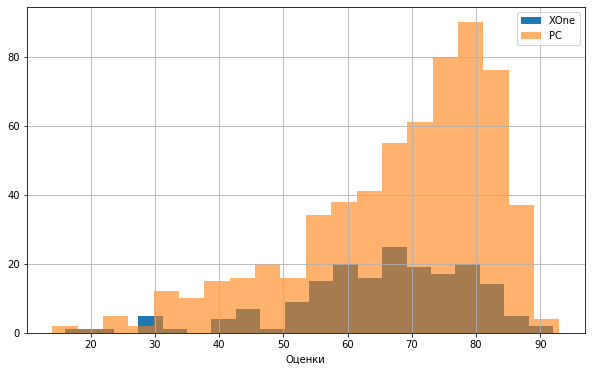

count    182.000000
mean      65.214286
std       13.809406
min       16.000000
25%       58.000000
50%       68.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64
count    615.000000
mean      68.300813
std       15.215892
min       14.000000
25%       59.000000
50%       73.000000
75%       80.000000
max       93.000000
Name: user_score, dtype: float64


In [36]:
rating_XOne.hist(bins=20, label='XOne', figsize=(10,6))
rating_PC.hist(bins=20, alpha=0.6, label='PC')
plt.xlabel('Оценки')
plt.legend(loc='upper right')
plt.show()
print(rating_XOne.describe())
print(rating_PC.describe())

Проверяем гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные." Возьмем за нулевую гипотезу равенство пользовательских рейтингов этих жанров, альтернативная гипотеза - рейтинги отличаются.

Так как у нас две выборки, представляющие две генеральные совокупности, то имеем дело с гипотезой о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Так как параметры совокупностей схожи, оставим параметр equal_var в значении по умолчанию (True).

In [37]:
rating_action = games_actual_data.loc[games_actual_data['genre']=='Action']['user_score']
rating_sports   = games_actual_data.loc[games_actual_data['genre']=='Sports']['user_score']

alpha_ratings = 0.05 #критический уровень статистической значимости

results_ratings = st.ttest_ind(rating_action, rating_sports)
print('p-значение: ', results_ratings.pvalue)

if (results_ratings.pvalue < alpha_ratings):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  3.493183815903131e-11
Отвергаем нулевую гипотезу


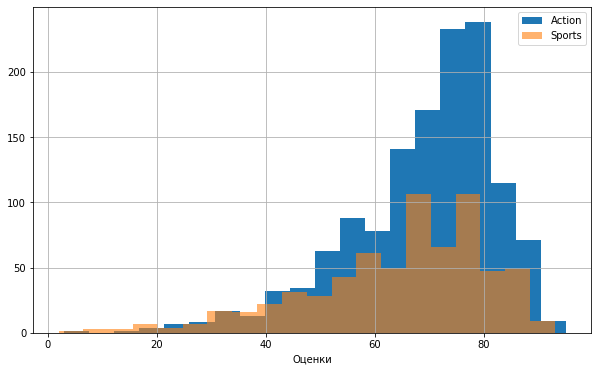

In [38]:
rating_action.hist(bins=20, label='Action', figsize=(10,6))
rating_sports.hist(bins=20, alpha=0.6, label='Sports')
plt.xlabel('Оценки')
plt.legend(loc='upper right')
plt.show()
#print(rating_action.describe())
#print(rating_sports.describe())

###### Таким образом гипотеза о равенстве средних рейтингов для Xbox One и PC не подтвердилась.
###### Гипотеза о различии средних рейтингов для жанров Action и Sports подтвердилась.

### Общий вывод

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Дорогой рекламный отдел! Поздравляю вас с наступающим 2016м годом!
В новом году нам следует обратить пристальное внимание на игры для платформ PS4, Xbox One, а также не забывать про PC и PSV. Именно эти платформы и в таком порядке могут показать рост продаж в следующем году. При этом именно игры для PS4, Xbox One приносят примерно вдвое больше прибыли, чем игры, выпускаемые на других платформах.

Жанры, на которые надо обратить внимание - это Action, Sports, Shooter, Role playing и Misc. Нашему японскому отделению отдельно хочу отдельно напомнить про ролевые игры.

Относительно рейтинга ESRB можно не особо беспокоиться, влияния на продажи он почти не оказывает. Больше всего продается игр с самым широким рейтингом «E» («Everyone»), затем идут «M» («Mature») — «Для взрослых», «T» («Teen») — «Подросткам» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Количество игр со всеми остальными рейтингами в сумме исчезающе малы.

Также не стоит придавать при выборе игр для продажи оценкам пользователей. А вот на оценки критиков стоит обратить больше внимания, чтобы не проглядеть потенциальный хит. Если же и пользователи, и критики сходятся в своих высоких оценках, то смело можно заказывать увеличиные партии этой игры.

Еще раз с наступающим Новым годом.
Купите там масок, перчаток и санитайзер для рук.